In [8]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib

In [4]:
df = pd.read_csv('smartBFT-bench.csv')

df.rename(columns={'Txns in block': 'Block Size', 'Nodes': 'Cluster Size'}, inplace=True)

SMALL_SIZE = 32
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
matplotlib.rc('font', family='Arial')
matplotlib.rc('text', usetex=True)

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'Arial',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=46)          # controls default text sizes
plt.rc('axes', titlesize=52)     # fontsize of the axes title
plt.rc('axes', labelsize=60)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=48)    # fontsize of the tick labels
plt.rc('ytick', labelsize=48)    # fontsize of the tick labels
plt.rc('legend', fontsize=32)    # legend fontsize
plt.rc('figure', titlesize=56)  # fontsize of the figure title

#lanRaft = df[(df['Setup']=='LAN') & (df['Type']=='Raft')]
#lanBFT = df[(df['Setup']=='LAN')  & (df['Type']=='BFT')]
#wanRaft = df[(df['Setup']=='WAN') & (df['Type']=='Raft')]
#wanBFT = df[(df['Setup']=='WAN')  & (df['Type']=='BFT')]

lan = df[(df['Setup']=='LAN')]
l = lan.copy()
l["Cluster Size"] = l.apply(lambda row: row['Type'] + " " + str(row['Cluster Size']), axis=1)

wan = df[(df['Setup']=='WAN')]
w = wan.copy()
w["Cluster Size"] = w.apply(lambda row: row['Type'] + " " + str(row['Cluster Size']), axis=1)

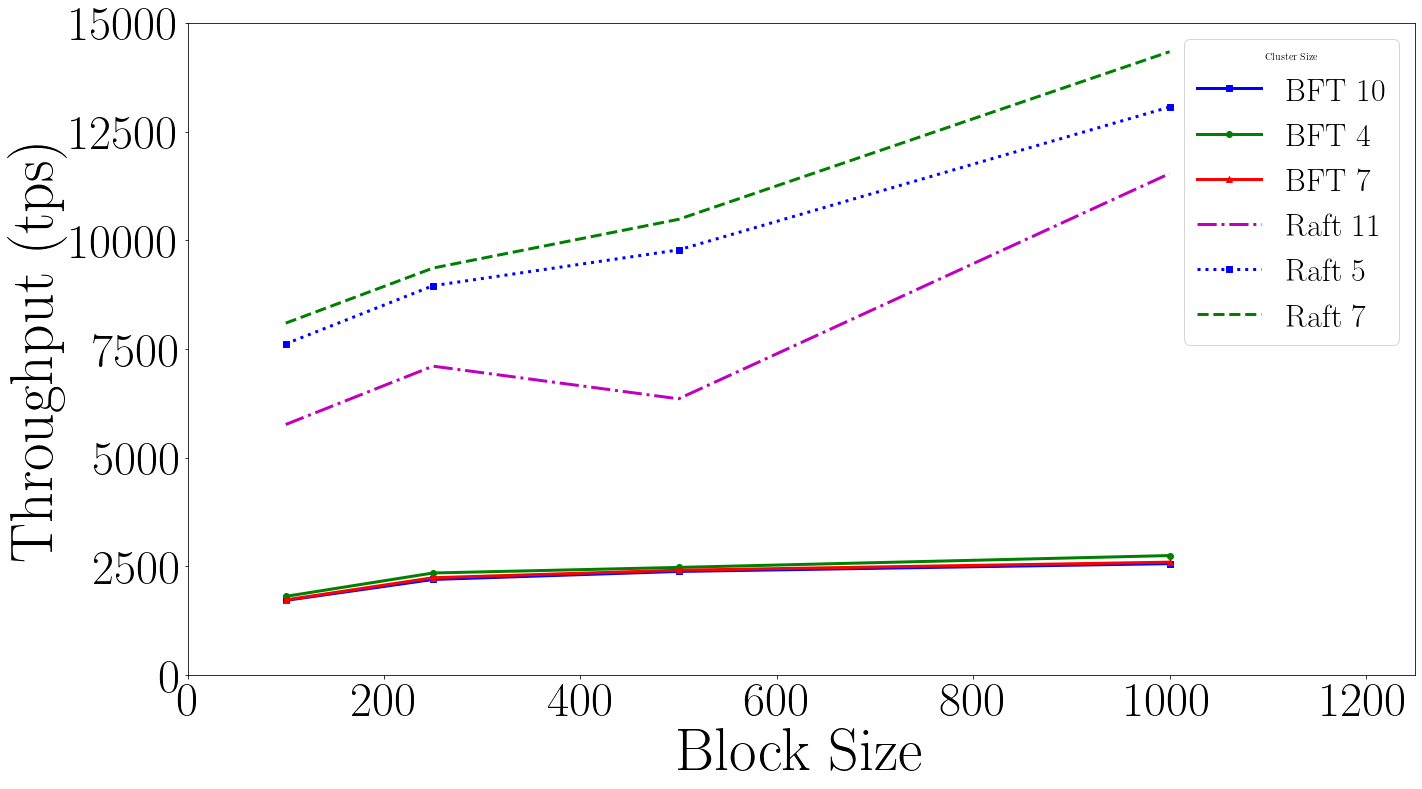

In [11]:
plt = pd.pivot_table(l, index=["Cluster Size", "Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(22, 12), style=['bs-','go-','r^-','m-.', 'bs:', 'g--'], linewidth=3)
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 15000)
plt.set_xlim(0, 1250)
plt.get_figure().savefig('figures/lan.png')

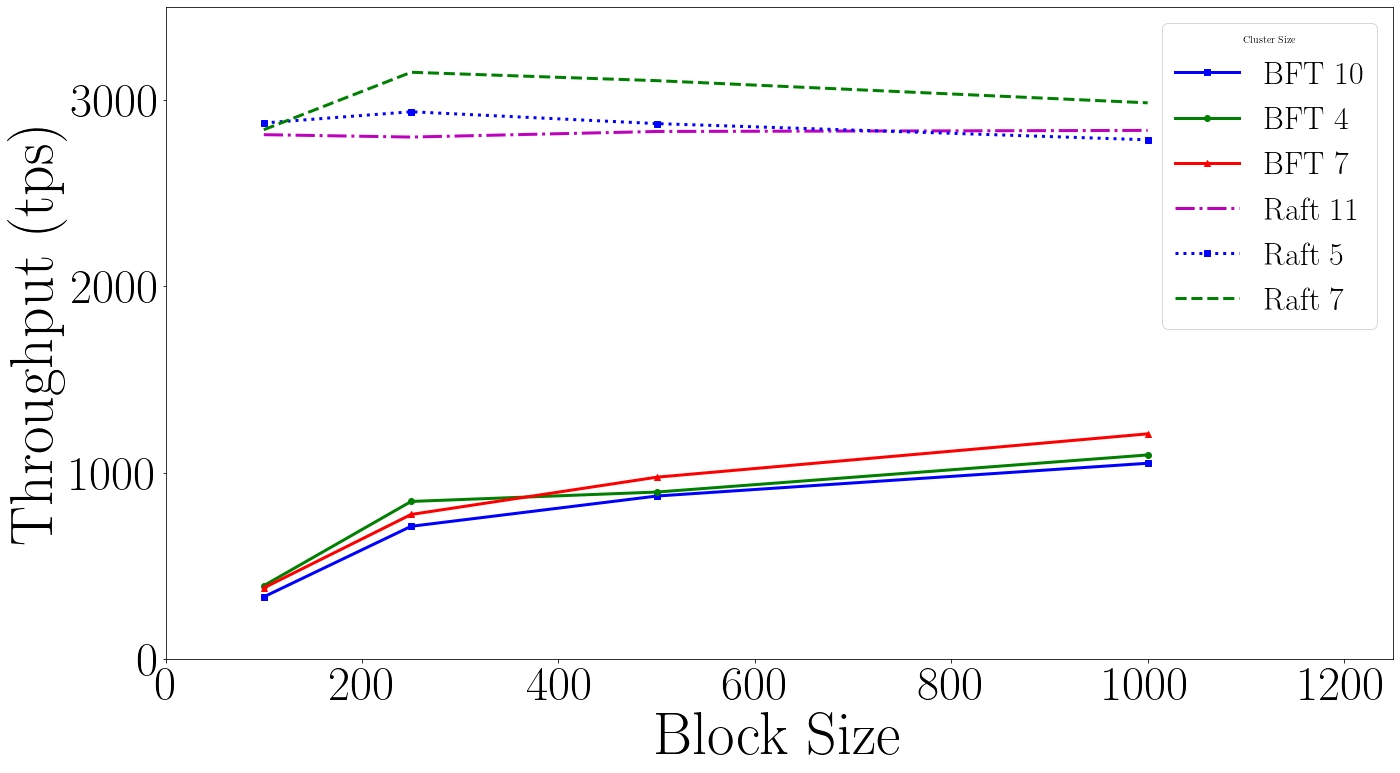

In [12]:
plt = pd.pivot_table(w, index=["Cluster Size", "Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(22, 12), style=['bs-','go-','r^-','m-.', 'bs:', 'g--'], linewidth=3)
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 3500)
plt.set_xlim(0, 1250)
plt.get_figure().savefig('figures/wan.png', dpi=100)

In [9]:
plt = pd.pivot_table(lan, index=["Cluster Size", "Type", "Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 6), style=['bs-','go-','r^-'])
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 15000)
plt.get_figure().savefig('lan_raft.png')

In [10]:
plt = pd.pivot_table(lanBFT, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 6),  style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 15000)
plt.get_figure().savefig('lan_bft.png')

NameError: name 'lanBFT' is not defined

In [ ]:
plt = pd.pivot_table(wanRaft, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 6), style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 4000)
plt.get_figure().savefig('wan_raft.png')

In [ ]:
plt = pd.pivot_table(wanBFT, index=["Cluster Size","Block Size"],values=["TPS"]).unstack(0)['TPS'].plot(figsize=(10, 6), style=['bs-','go-','r^-'], kind='bar')
plt.set_ylabel('Throughput (tps)')
plt.set_xlabel('Block  Size')
plt.set_ylim(0, 4000)
plt.get_figure().savefig('wan_bft.png')

In [ ]:
SMALL_SIZE = 24
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

times = pd.read_csv('times.csv')
plt = pd.pivot_table(times[times['Cluster Size']==4], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_4.png')

In [ ]:
times = pd.read_csv('times.csv')
pd.pivot_table(times[times['Cluster Size']==7], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_7.png')

In [ ]:
times = pd.read_csv('times.csv')
pd.pivot_table(times[times['Cluster Size']==10], index=["Stage", "Block Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.get_figure().savefig('bft_stages_10.png')

In [ ]:
plt = pd.pivot_table(times, index=["Stage", "Block Size", "Cluster Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12), stacked=True)
plt.set_ylabel('[ms]')
plt.set_xlabel('Block Size [tx]')
plt.get_figure().savefig('bft_block_cluster.png')

In [ ]:
times = pd.read_csv('times.csv')
pd.pivot_table(times, index=["Stage", "Block Size", "Cluster Size"],values=["Time"]).unstack(0)['Time'].plot(kind='bar', figsize=(14, 12))


In [ ]:
times = pd.read_csv('times.csv')
times.loc[:,["Stage", "Block Size", "Cluster Size", "Time"]].groupby(["Stage", "Block Size", "Cluster Size"]).mean().unstack(1)['Time'].groupby(level=1).agg(lambda x: 100/x.sum())

In [ ]:
times = pd.read_csv('times.csv')
times['normalized'] = times['Time'] / times['Block Size']
plt = pd.pivot_table(times[times['Cluster Size']==10], index=["Stage","Block Size"],values=["normalized"]).unstack(0)['normalized'].plot(kind='bar', legend=None, figsize=(16, 14), stacked=True)
plt.set_ylabel('[ms/tx]')
plt.set_xlabel('Block Size [tx]')
plt.get_figure().savefig('bft_ms_txns_normalized.png')